In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.sample(8)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34544,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11617,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31472,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6671,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37616,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26030,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9932,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14946,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
import matplotlib.pyplot as plt

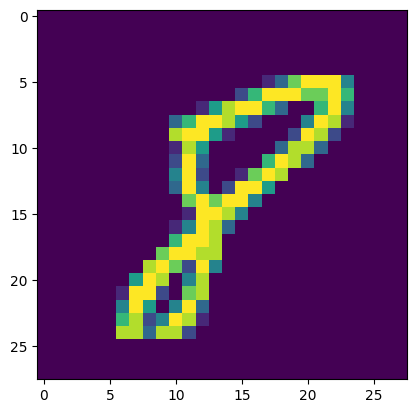

In [6]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

In [7]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [9]:
X_train.shape

(33600, 784)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier()

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
y_pred =knn.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9671428571428572

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 200)

In [19]:
X_train_trf = pca.fit_transform(X_train_scale)
X_test_trf = pca.transform(X_test_scale)

In [20]:
X_train.shape

(33600, 784)

In [21]:
knn = KNeighborsClassifier()

In [22]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [23]:
y_pred_trf =knn.predict(X_test_trf)

In [24]:
accuracy_score(y_test,y_pred_trf)

0.9515476190476191

In [25]:
# for i in range(1,785):
#     pca = PCA(n_components= i)
#     X_train_trf = pca.fit_transform(X_train_scale)
#     X_test_trf = pca.transform(X_test_scale)
    
#     knn = KNeighborsClassifier()
#     knn.fit(X_train_trf,y_train)
    
#     y_pred_trf =knn.predict(X_test_trf)
    
#     print(i, accuracy_score(y_test,y_pred_trf))

In [26]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train_scale)
X_test_trf = pca.transform(X_test_scale)

In [27]:
X_train_trf

array([[ -6.55494449,  -3.90123206],
       [  1.49107669,  -0.56378593],
       [  5.48664649, -11.19791   ],
       ...,
       [  2.55673864,   0.85384725],
       [ -6.92692715,  -1.95703992],
       [ -5.69206963,  -3.80133187]])

In [28]:
import plotly.express as px

y_train_trf = y_train.astype(str)

fig = px.scatter(x= X_train_trf[:,0],
                y= X_train_trf[:,1],
                color=y_train_trf,
                color_discrete_sequence = px.colors.qualitative.G10
                )
fig.show()

In [29]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train_scale)
X_test_trf = pca.transform(X_test_scale)

In [30]:
X_train_trf

array([[ -6.55502676,  -3.901491  ,   3.70385431],
       [  1.49110237,  -0.56293777,   0.9829316 ],
       [  5.48656229, -11.19933085,   2.85827313],
       ...,
       [  2.55667209,   0.85371332,   2.66600038],
       [ -6.92686347,  -1.95693026,   2.79555195],
       [ -5.69210591,  -3.80224403,   1.86742403]])

In [31]:
import plotly.express as px

y_train_trf = y_train.astype(str)

fig = px.scatter_3d(df,
                x= X_train_trf[:,0],
                y= X_train_trf[:,1],
                z= X_train_trf[:,2],
                color=y_train_trf,
                color_discrete_sequence = px.colors.qualitative.G10
                )
fig.show()

In [32]:
pca.explained_variance_

array([40.75597527, 29.08811384, 26.66609143])

**These are Egien values which in math is lamda. these are top 3**

In [33]:
pca.components_

array([[-1.50273775e-17, -1.26440816e-18,  1.91149055e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-7.89498620e-19, -4.64087734e-17, -7.17617458e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.47641727e-17,  3.97338460e-17,  4.30391855e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [34]:
pca.components_.shape

(3, 784)

In [35]:
pca.explained_variance_ratio_

array([0.05772629, 0.04120007, 0.03776954])

In [36]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train_scale)
X_test_trf = pca.transform(X_test_scale)

In [37]:
pca.explained_variance_.shape

(784,)

In [38]:
np.cumsum(pca.explained_variance_ratio_)


array([0.05772629, 0.09892636, 0.1366959 , 0.16631665, 0.19189272,
       0.21432232, 0.23390514, 0.2515915 , 0.26731975, 0.28159364,
       0.29526436, 0.30749639, 0.3189692 , 0.33014971, 0.34066885,
       0.35085235, 0.36039079, 0.3697645 , 0.37883953, 0.38773799,
       0.39614582, 0.40429209, 0.41207344, 0.41964063, 0.42693654,
       0.43393911, 0.44085449, 0.4475364 , 0.45387161, 0.46003117,
       0.46610406, 0.47210897, 0.47787471, 0.48361286, 0.48926121,
       0.49475884, 0.50017489, 0.50543781, 0.5104829 , 0.51539121,
       0.52026442, 0.52502942, 0.52966605, 0.53425722, 0.53879721,
       0.54327913, 0.54771117, 0.55208665, 0.55640821, 0.56070999,
       0.56493689, 0.56908372, 0.57317103, 0.57717497, 0.5811473 ,
       0.58506348, 0.58892089, 0.59274036, 0.59642296, 0.60008844,
       0.60368522, 0.6072144 , 0.61069911, 0.61414882, 0.61757117,
       0.62098573, 0.62436077, 0.62767585, 0.63094538, 0.63415873,
       0.63735435, 0.64053188, 0.64366798, 0.64676739, 0.64981

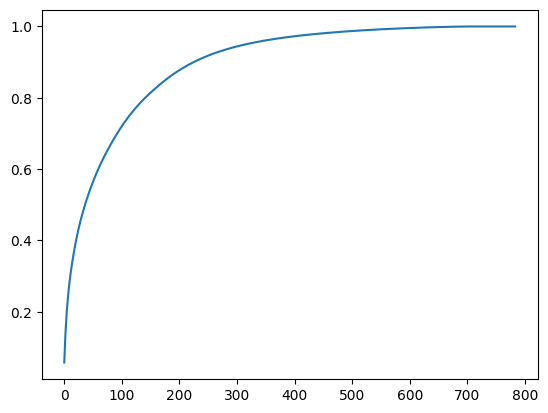

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))